# Smoothing filters

This notebook provides a visualisation comparing the different smoothing filters from [Wotan](https://github.com/hippke/wotan). We are looking for to flatten lightcurves at an appropriate window length, but one which would not effect the depth or shape of the transit as much as possible.

In [1]:
import os

os.chdir("../")
from scripts.analysis_tools_cython import *
from scripts.post_processing import *
from scipy.signal import savgol_filter
from wotan import flatten
import pylab

# import lightcurve - betapic

In [3]:
table = import_lightcurve(
    "betapic/test/hlsp_tess-spoc_tess_phot_0000000270577175-s0006_tess_v1_lc.fits"
)[0]

Text(0.5, 0, 'Time in BTJD')

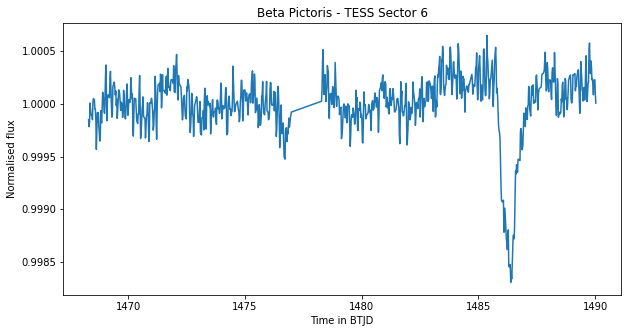

In [4]:
plt.figure(figsize=(10, 5))
plt.plot(table["TIME"], normalise_lc(table["PDCSAP_FLUX"]))
plt.title("Beta Pictoris - TESS Sector 6")
plt.ylabel("Normalised flux")
plt.xlabel("Time in BTJD")

# import lightcurve - TIC 7421463

In [5]:
# lc,info = import_XRPlightcurve('lightcurves/tesslc_144733706.pkl',sector=6,clip=3,drop_bad_points=True) # TOI588 - transiting hot jupiter
lc, info = import_XRPlightcurve(
    "/storage/astro2/phrdhx/tesslcs/tesslcs_sector_6_104/tesslcs_tmag_7_8/tesslc_7421463.pkl",
    sector=6,
    clip=3,
    drop_bad_points=True,
)

## Functions

In [38]:
def apply_savgol(flux, window_length, polynomial=2):
    return savgol_filter(normalise_lc(flux), window_length, polynomial, mode="nearest")


def flatten_function(time, flux, window1, window2, window3, window4, mode):
    """four plot function of various smoothing methods"""
    flat_lc1, trend_lc1 = flatten(
        time, flux, window_length=window1, return_trend=True, method=mode
    )
    flat_lc2, trend_lc2 = flatten(
        time, flux, window_length=window2, return_trend=True, method=mode
    )
    flat_lc3, trend_lc3 = flatten(
        time, flux, window_length=window3, return_trend=True, method=mode
    )
    flat_lc4, trend_lc4 = flatten(
        time, flux, window_length=window4, return_trend=True, method=mode
    )

    fig, ax = plt.subplots(4, figsize=(20, 10))
    ax[0].scatter(time, normalise_lc(flux), label="regular lightcurve")
    ax[1].scatter(time, normalise_lc(flux), label="regular lightcurve", alpha=0.3)
    ax[2].scatter(time, normalise_lc(flux), label="regular lightcurve", alpha=0.3)
    ax[3].scatter(time, normalise_lc(flux), label="regular lightcurve", alpha=0.3)

    ax[0].plot(
        time, flat_lc1, label=f"{window1} day {mode}", color="yellow", linewidth=3
    )
    ax[1].plot(
        time, flat_lc2, label=f"{window2} day {mode}", color="orange", linewidth=3
    )
    ax[2].plot(time, flat_lc3, label=f"{window3} day {mode}", color="k", linewidth=3)
    ax[3].plot(time, flat_lc4, label=f"{window4} {mode}", color="red", linewidth=3)

    ax[0].legend()
    ax[1].legend()
    ax[2].legend()
    ax[3].legend()


def multiplot_windowlength(time, flux, day, combined_plot=False):
    """plots comparing all methods"""
    flat_lc_biweight, trend_lc1 = flatten(
        time, flux, window_length=day, return_trend=True, method="biweight"
    )
    flat_lc_mean, trend_lc2 = flatten(
        time, flux, window_length=day, return_trend=True, method="mean"
    )
    flat_lc_median, trend_lc3 = flatten(
        time, flux, window_length=day, return_trend=True, method="median"
    )
    flat_lc_lowess, trend_lc4 = flatten(
        time, flux, window_length=day, return_trend=True, method="lowess"
    )
    flat_lc_rspline, trend_lc5 = flatten(
        time, flux, window_length=day, return_trend=True, method="rspline"
    )

    fig, ax = plt.subplots(6, figsize=(14, 8), sharex=True)

    ax[1].plot(
        time, normalise_lc(flux), label="regular lightcurve", alpha=0.2, color="k"
    )
    ax[2].plot(
        time, normalise_lc(flux), label="regular lightcurve", alpha=0.2, color="k"
    )
    ax[3].plot(
        time, normalise_lc(flux), label="regular lightcurve", alpha=0.2, color="k"
    )
    ax[4].plot(
        time, normalise_lc(flux), label="regular lightcurve", alpha=0.2, color="k"
    )
    ax[5].plot(
        time, normalise_lc(flux), label="regular lightcurve", alpha=0.2, color="k"
    )

    ax[0].plot(time, normalise_lc(flux), label="regular lightcurve", linewidth=3)
    ax[1].plot(time, flat_lc_biweight, label="biweight", color="orange", linewidth=3)
    ax[2].plot(time, flat_lc_mean, label="sliding mean", color="blue", linewidth=3)
    ax[3].plot(time, flat_lc_median, label="sliding median", color="red", linewidth=3)
    ax[4].plot(time, flat_lc_lowess, label="lowess", color="green", linewidth=3)
    ax[5].plot(time, flat_lc_rspline, label="robust spline", color="grey", linewidth=3)

    # ax[3].plot(time,flat_lc4,label=f'{window4} {mode}')

    ax[0].legend(loc="lower left")
    ax[1].legend(loc="lower left")
    ax[2].legend(loc="lower left")
    ax[3].legend(loc="lower left")
    ax[4].legend(loc="lower left")
    ax[5].legend(loc="lower left")

    plt.xlabel("Time - 2457000 (BTJD Days)")
    fig.text(-0.01, 0.5, "Normalised Flux", va="center", rotation="vertical")

    plt.tight_layout()

    if combined_plot:
        plt.figure(figsize=(40, 15))
        plt.scatter(time, normalise_lc(flux), label="regular lightcurve")
        plt.plot(
            time,
            flat_lc_biweight,
            label="biweight",
            color="orange",
            linewidth=4,
            alpha=0.2,
        )
        plt.plot(
            time, flat_lc_mean, label="mean", color="lavender", linewidth=4, alpha=0.2
        )
        plt.plot(
            time, flat_lc_median, linewidth=4, color="red", label="median", alpha=0.7
        )
        plt.plot(
            time, flat_lc_lowess, linewidth=4, color="blue", label="lowess", alpha=0.7
        )
        plt.plot(
            time, flat_lc_rspline, linewidth=4, color="grey", label="rspline", alpha=0.2
        )
        plt.ylim([normalise_lc(flux).min() - 0.002, normalise_lc(flux).max() + 0.002])
        plt.xlabel("Days in BTJD")

        plt.legend(loc="lower left", fontsize=14)


def twoplot_windowlength(time, flux, day, combined_plot=False):
    """plots comparing all methods"""
    flat_lc_mean, trend_lc2 = flatten(
        time, flux, window_length=day, return_trend=True, method="mean"
    )
    flat_lc_median, trend_lc3 = flatten(
        time, flux, window_length=day, return_trend=True, method="median"
    )

    fig, ax = plt.subplots(2, figsize=(5, 5), sharex=True, sharey=True)

    ax[0].plot(
        time[700:],
        normalise_lc(flux)[700:],
        label="regular lightcurve",
        alpha=0.8,
        color="y",
    )
    ax[1].plot(
        time[700:],
        normalise_lc(flux)[700:],
        label="regular lightcurve",
        alpha=0.8,
        color="y",
    )

    ax[0].plot(
        time[700:], flat_lc_mean[700:], label="sliding mean", color="white", linewidth=3
    )
    ax[1].plot(
        time[700:],
        flat_lc_median[700:],
        label="sliding median",
        color="white",
        linewidth=3,
    )

    ax[0].legend(loc="lower left", fontsize=14)
    ax[1].legend(loc="lower left", fontsize=14)
    # plt.xlabel('Time in BTJD',fontsize=12)
    # plt.ylabel('Normalised flux',fontsize=12)
    # aset_xlabel('Time in BTJD',fontsize=12)
    ax[1].set_ylabel("Normalised flux", fontsize=12)

    ax[0].xaxis.label.set_color("white")  # setting up X-axis label color to yellow
    ax[0].yaxis.label.set_color("white")  # setting up Y-axis label color to blue
    ax[0].tick_params(axis="x", colors="white")  # setting up X-axis tick color to red
    ax[0].tick_params(axis="y", colors="white")

    ax[1].xaxis.label.set_color("white")  # setting up X-axis label color to yellow
    ax[1].yaxis.label.set_color("white")  # setting up Y-axis label color to blue
    ax[1].tick_params(
        axis="x", colors="white", labelsize=12
    )  # setting up X-axis tick color to red
    ax[1].tick_params(axis="y", colors="white", labelsize=12)

    ax[0].spines["left"].set_color("white")  # setting up Y-axis tick color to red
    ax[0].spines["top"].set_color("white")
    ax[0].spines["right"].set_color("white")  # setting up Y-axis tick color to red
    ax[0].spines["bottom"].set_color("white")

    ax[1].spines["left"].set_color("white")  # setting up Y-axis tick color to red
    ax[1].spines["top"].set_color("white")
    ax[1].spines["right"].set_color("white")  # setting up Y-axis tick color to red
    ax[1].spines["bottom"].set_color("white")

    plt.tight_layout()
    plt.savefig("poster/smoothing_plot.png", transparent=True, dpi=300)

## Savitzky-Golay

### TIC 270577175

In [7]:
y_smooth_3day_betapic = apply_savgol(table["PDCSAP_FLUX"], 143)
y_smooth_2day_betapic = apply_savgol(table["PDCSAP_FLUX"], 97)
y_smooth_1day_betapic = apply_savgol(table["PDCSAP_FLUX"], 49)
y_smooth_5day_betapic = apply_savgol(table["PDCSAP_FLUX"], 241)

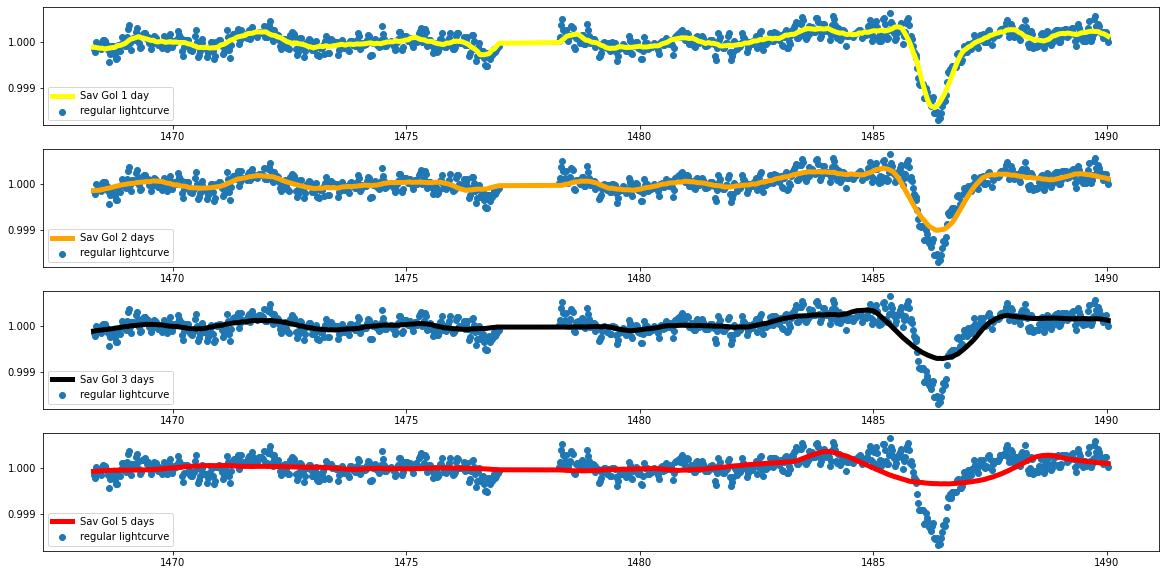

In [8]:
fig, ax = plt.subplots(4, figsize=(20, 10))
ax[0].scatter(
    table["TIME"], normalise_lc(table["PDCSAP_FLUX"]), label="regular lightcurve"
)
ax[1].scatter(
    table["TIME"], normalise_lc(table["PDCSAP_FLUX"]), label="regular lightcurve"
)
ax[2].scatter(
    table["TIME"], normalise_lc(table["PDCSAP_FLUX"]), label="regular lightcurve"
)
ax[3].scatter(
    table["TIME"], normalise_lc(table["PDCSAP_FLUX"]), label="regular lightcurve"
)

ax[0].plot(
    table["TIME"],
    y_smooth_1day_betapic,
    label="Sav Gol 1 day",
    color="yellow",
    linewidth=5,
)
ax[1].plot(
    table["TIME"],
    y_smooth_2day_betapic,
    label="Sav Gol 2 days",
    color="orange",
    linewidth=5,
)
ax[2].plot(
    table["TIME"], y_smooth_3day_betapic, label="Sav Gol 3 days", color="k", linewidth=5
)
ax[3].plot(
    table["TIME"],
    y_smooth_5day_betapic,
    label="Sav Gol 5 days",
    color="red",
    linewidth=5,
)

ax[0].legend()
ax[1].legend()
ax[2].legend()
ax[3].legend()

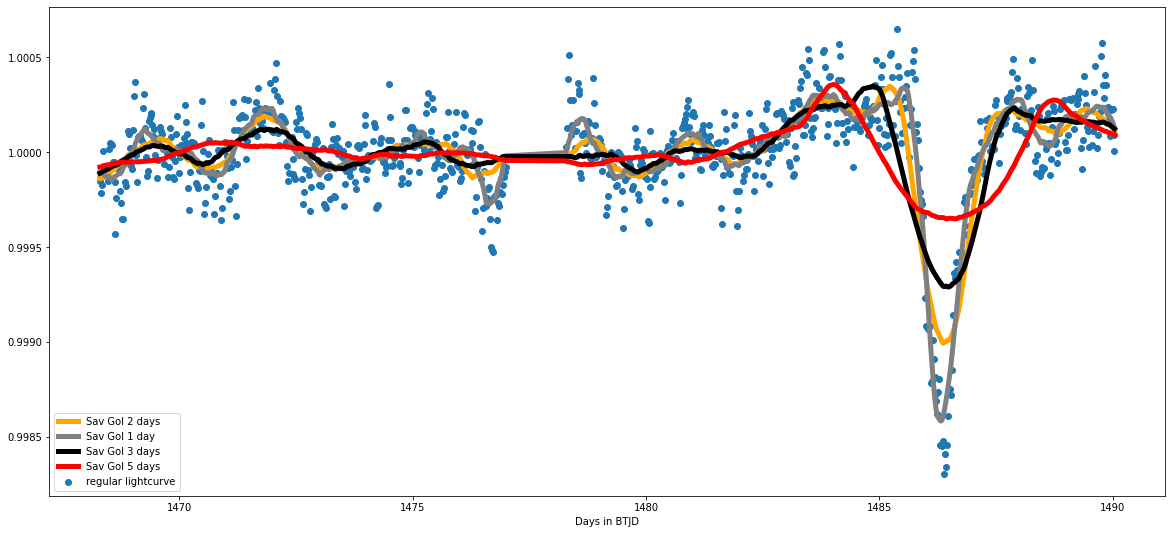

In [9]:
plt.figure(figsize=(20, 9))
plt.scatter(
    table["TIME"], normalise_lc(table["PDCSAP_FLUX"]), label="regular lightcurve"
)
plt.plot(
    table["TIME"],
    y_smooth_2day_betapic,
    label="Sav Gol 2 days",
    color="orange",
    linewidth=5,
)
plt.plot(
    table["TIME"],
    y_smooth_1day_betapic,
    label="Sav Gol 1 day",
    color="grey",
    linewidth=5,
)
plt.plot(
    table["TIME"], y_smooth_3day_betapic, linewidth=5, label="Sav Gol 3 days", color="k"
)
plt.plot(
    table["TIME"],
    y_smooth_5day_betapic,
    label="Sav Gol 5 days",
    color="red",
    linewidth=5,
)

plt.xlabel("Days in BTJD")
plt.legend()
plt.show()

### TIC 7421463

In [10]:
flux_smooth_1day = apply_savgol(lc["corrected flux"], 49)
flux_smooth_2day = apply_savgol(lc["corrected flux"], 97)
flux_smooth_3day = apply_savgol(lc["corrected flux"], 143)
flux_smooth_5day = apply_savgol(lc["corrected flux"], 241)

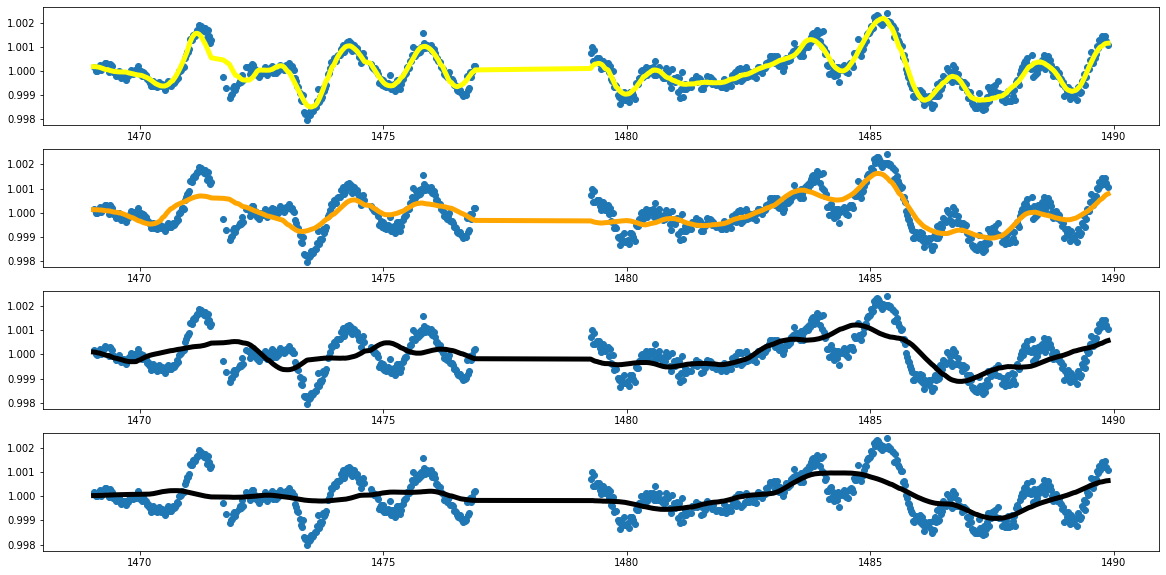

In [11]:
fig1, ax1 = plt.subplots(4, figsize=(20, 10))
ax1[0].scatter(
    lc["time"], normalise_lc(lc["corrected flux"]), label="regular lightcurve"
)
ax1[1].scatter(
    lc["time"], normalise_lc(lc["corrected flux"]), label="regular lightcurve"
)
ax1[2].scatter(
    lc["time"], normalise_lc(lc["corrected flux"]), label="regular lightcurve"
)
ax1[3].scatter(
    lc["time"], normalise_lc(lc["corrected flux"]), label="regular lightcurve"
)

ax1[0].plot(
    lc["time"], flux_smooth_1day, label="Sav Gol 1 day", color="yellow", linewidth=5
)
ax1[1].plot(
    lc["time"], flux_smooth_2day, label="Sav Gol 2 days", color="orange", linewidth=5
)
ax1[2].plot(
    lc["time"], flux_smooth_3day, label="Sav Gol 3 days", color="k", linewidth=5
)
ax1[3].plot(
    lc["time"], flux_smooth_5day, label="Sav Gol 5 days", color="k", linewidth=5
)

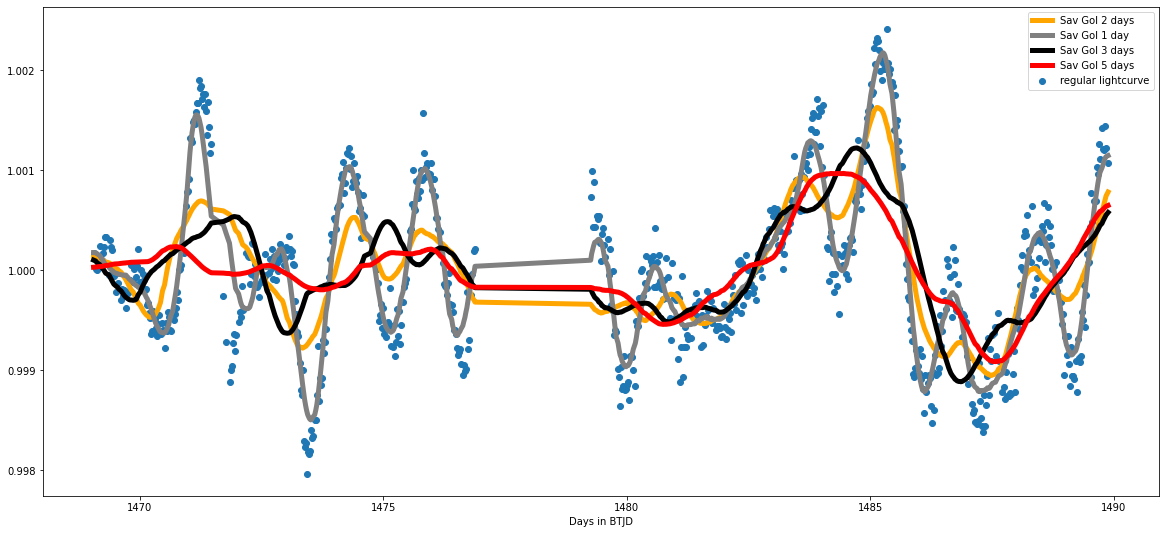

In [12]:
plt.figure(figsize=(20, 9))
plt.scatter(lc["time"], normalise_lc(lc["corrected flux"]), label="regular lightcurve")
plt.plot(
    lc["time"], flux_smooth_2day, label="Sav Gol 2 days", color="orange", linewidth=5
)
plt.plot(lc["time"], flux_smooth_1day, label="Sav Gol 1 day", color="grey", linewidth=5)
plt.plot(lc["time"], flux_smooth_3day, linewidth=5, label="Sav Gol 3 days", color="k")
plt.plot(lc["time"], flux_smooth_5day, label="Sav Gol 5 days", color="red", linewidth=5)

plt.xlabel("Days in BTJD")
plt.legend()
plt.show()

## Wotan: biweight

### TIC 270577175

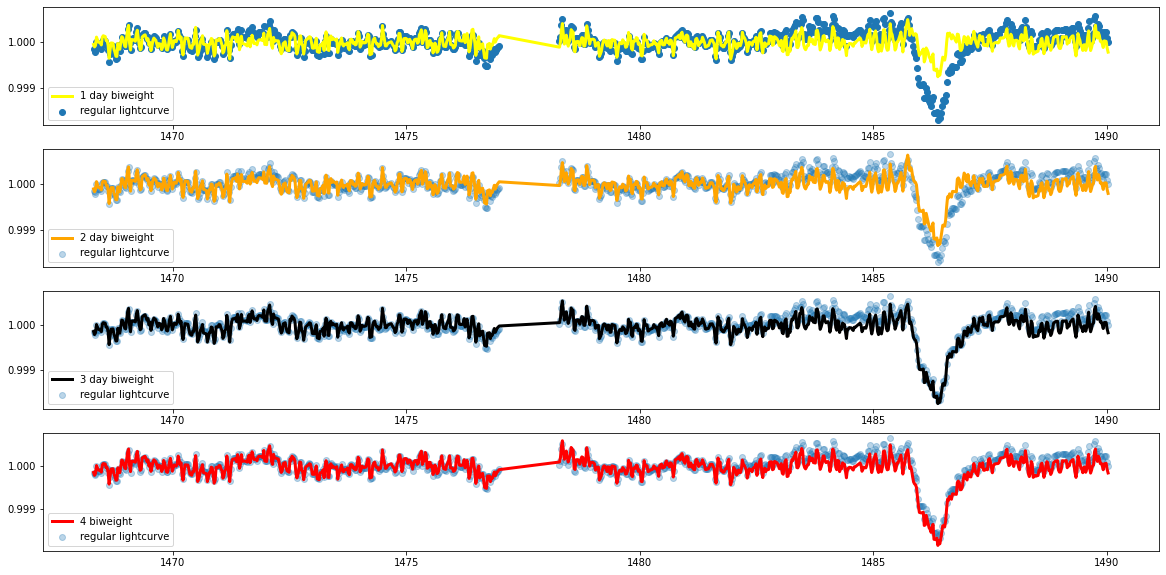

In [13]:
flatten_function(table["TIME"], table["PDCSAP_FLUX"], 1, 2, 3, 4, "biweight")

### TIC 7421463

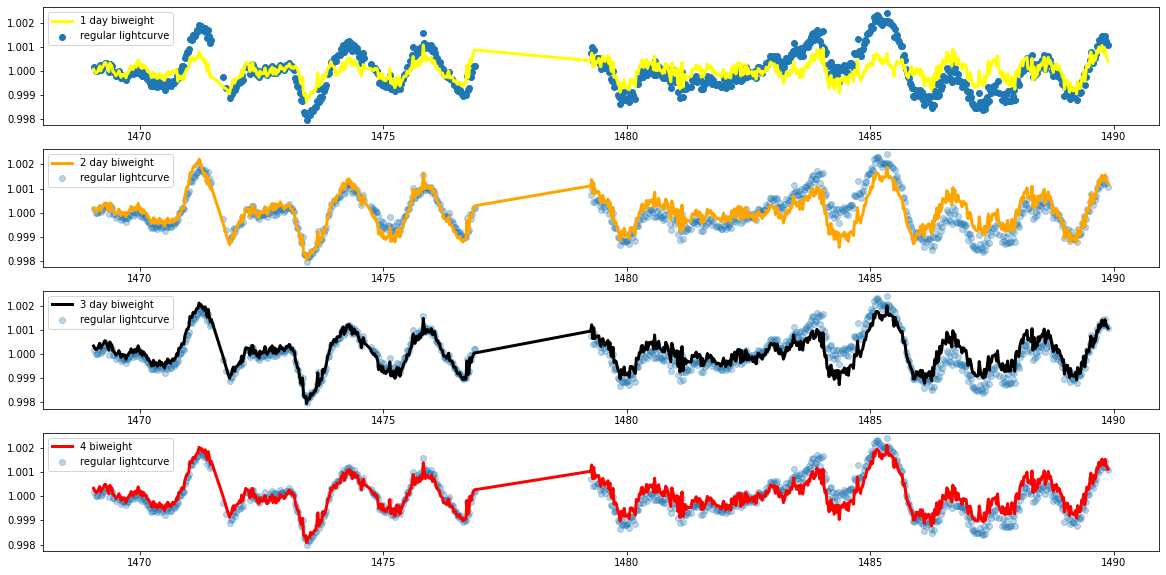

In [14]:
flatten_function(lc["time"], lc["corrected flux"], 1, 2, 3, 4, "biweight")

---

## Wotan: sliding mean

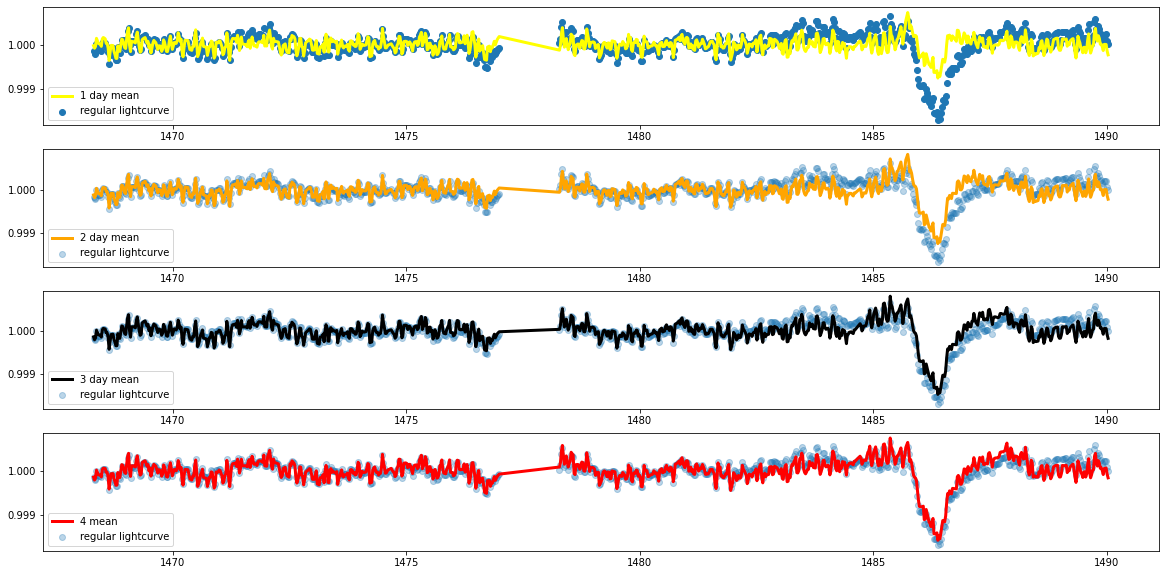

In [15]:
flatten_function(table["TIME"], table["PDCSAP_FLUX"], 1, 2, 3, 4, "mean")

### TIC 7421463

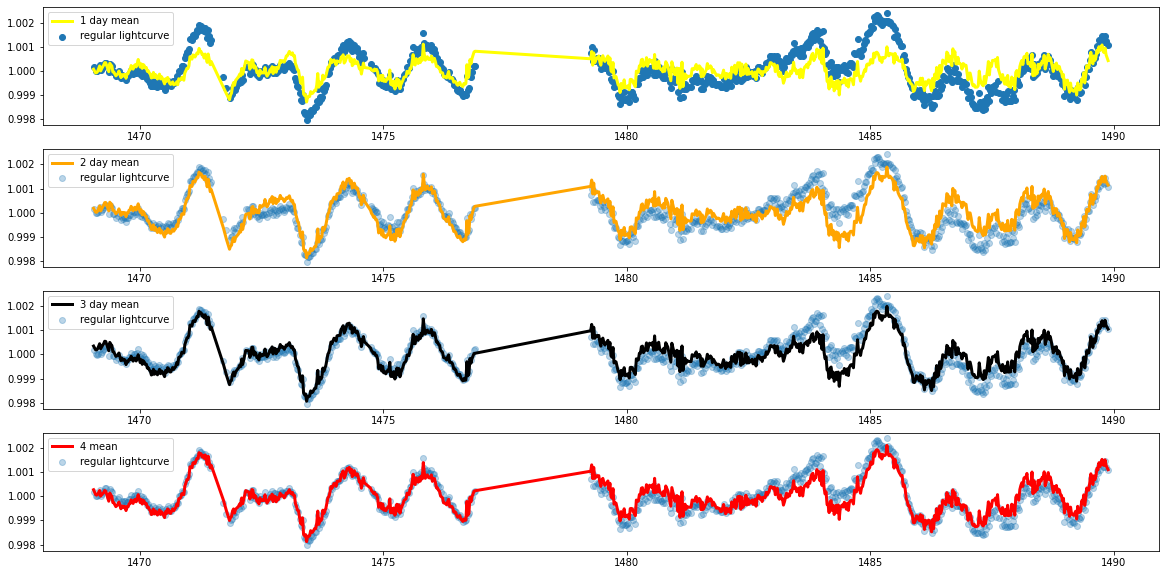

In [16]:
flatten_function(lc["time"], lc["corrected flux"], 1, 2, 3, 4, "mean")

---

## wotan: sliding median
- The difference between a sliding median (this section) and a median filter, i.e: `medfilt`, is how they are windowed. 
    - A sliding median is filtered on the number of days.
    - `medfilt` is a cadence-based window.
- Time windowed filters avoid the problem of cadence-based filters eg Sav-Gol

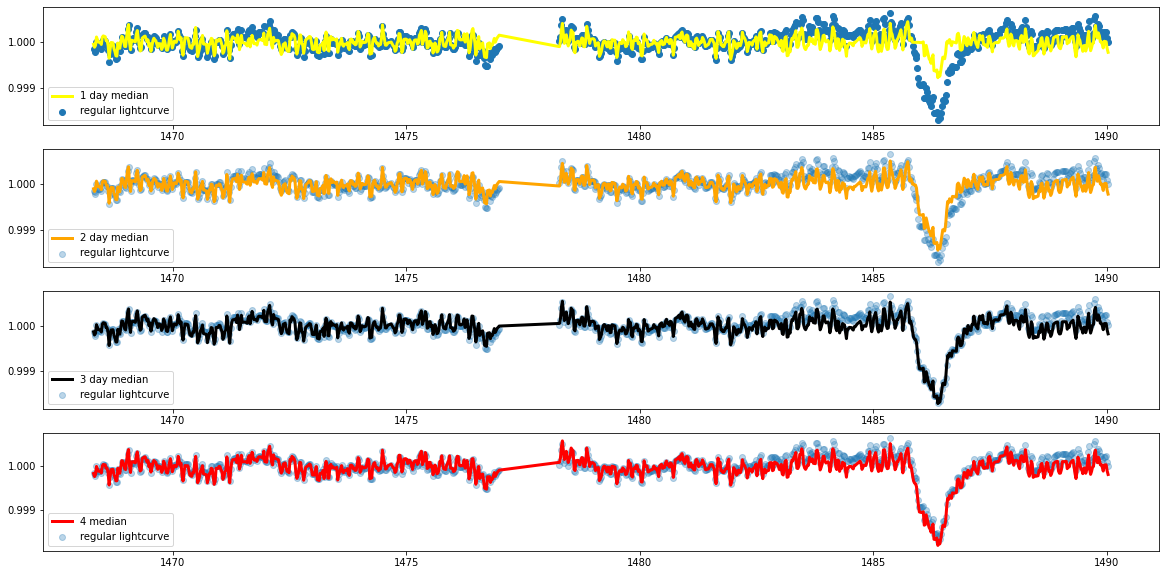

In [17]:
flatten_function(table["TIME"], table["PDCSAP_FLUX"], 1, 2, 3, 4, "median")

---

## wotan: trimmed mean

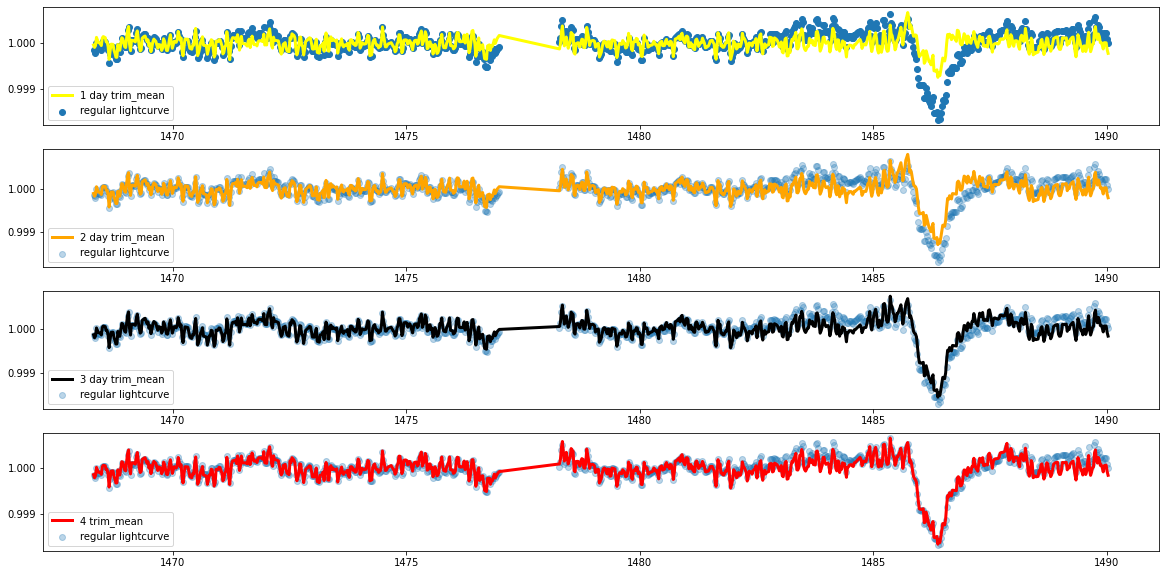

In [18]:
flatten_function(table["TIME"], table["PDCSAP_FLUX"], 1, 2, 3, 4, "trim_mean")

### TIC 7421463

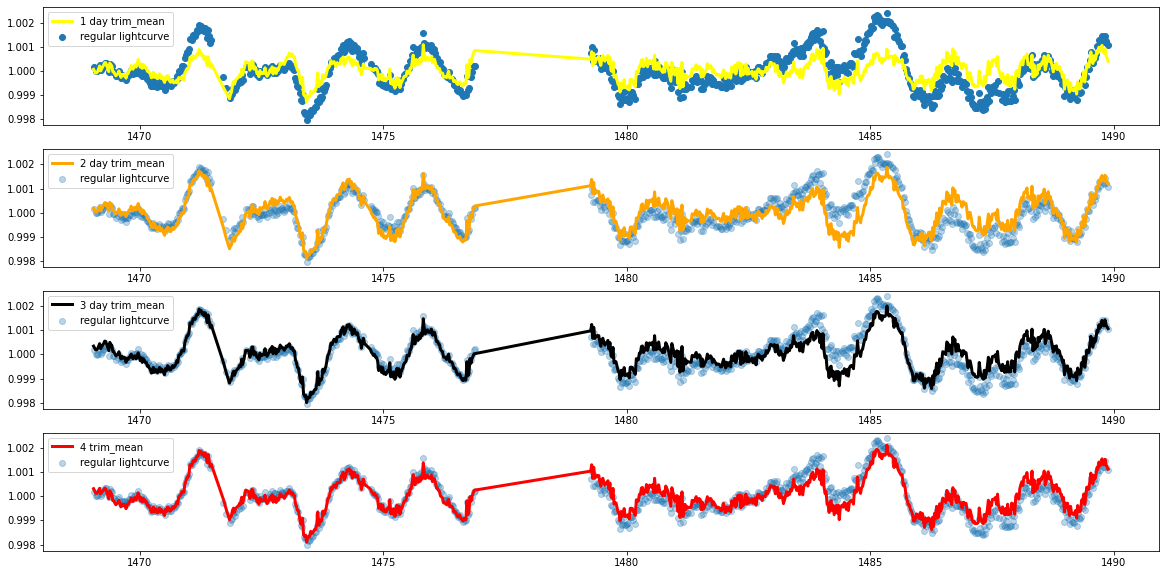

In [19]:
flatten_function(lc["time"], lc["corrected flux"], 1, 2, 3, 4, "trim_mean")

---

## wotan: lowess

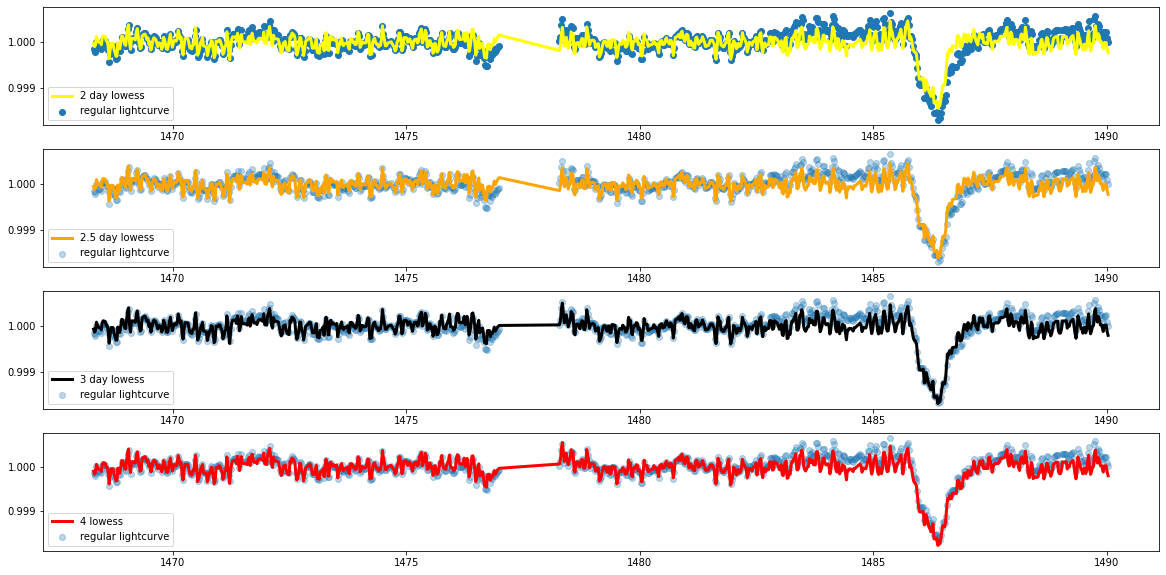

In [20]:
flatten_function(table["TIME"], table["PDCSAP_FLUX"], 2, 2.5, 3, 4, "lowess")

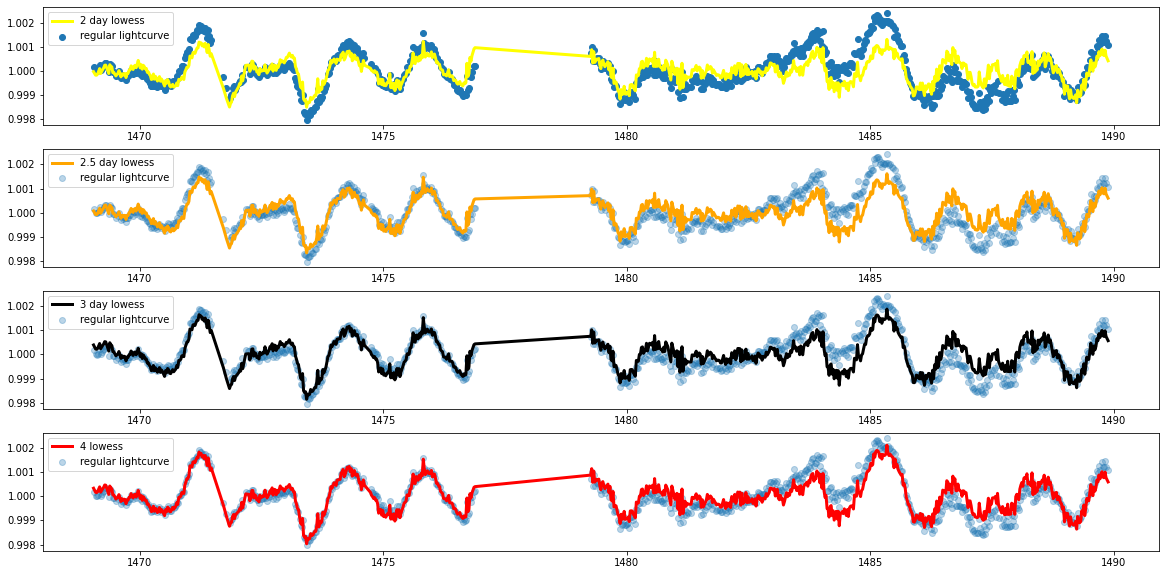

In [21]:
flatten_function(lc["time"], lc["corrected flux"], 2, 2.5, 3, 4, "lowess")

## wotan: robust spline

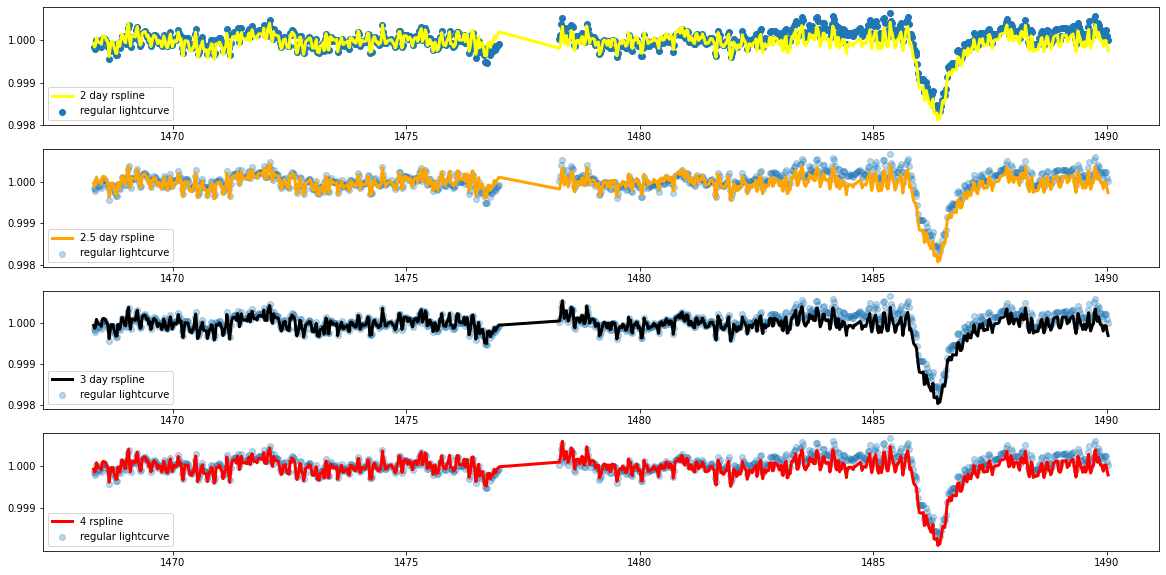

In [22]:
flatten_function(table["TIME"], table["PDCSAP_FLUX"], 2, 2.5, 3, 4, "rspline")

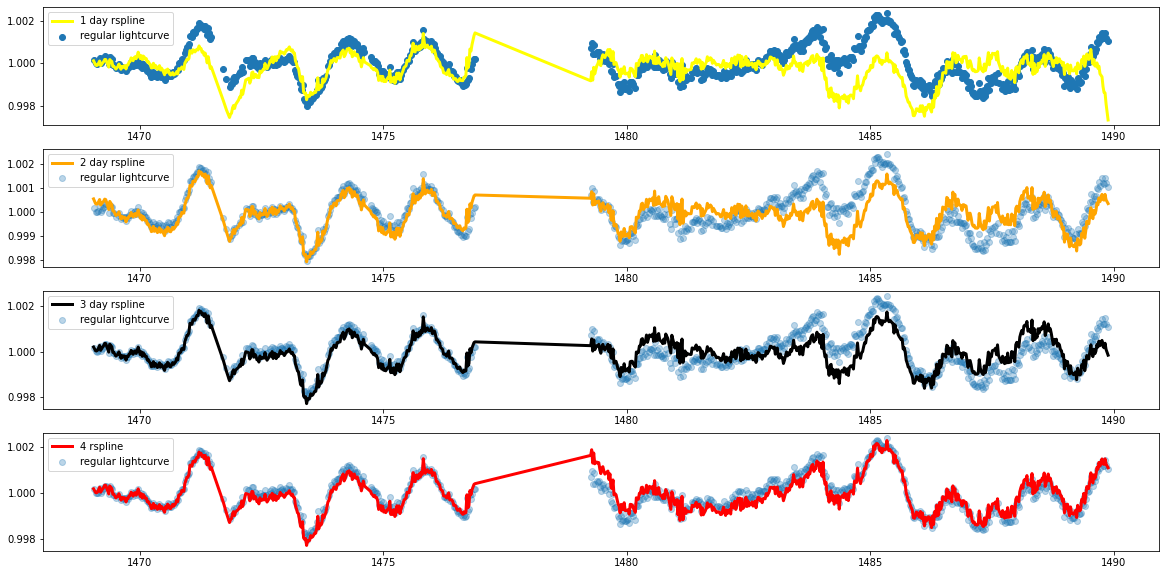

In [23]:
flatten_function(lc["time"], lc["corrected flux"], 1, 2, 3, 4, "rspline")

---

## wotan: hspline

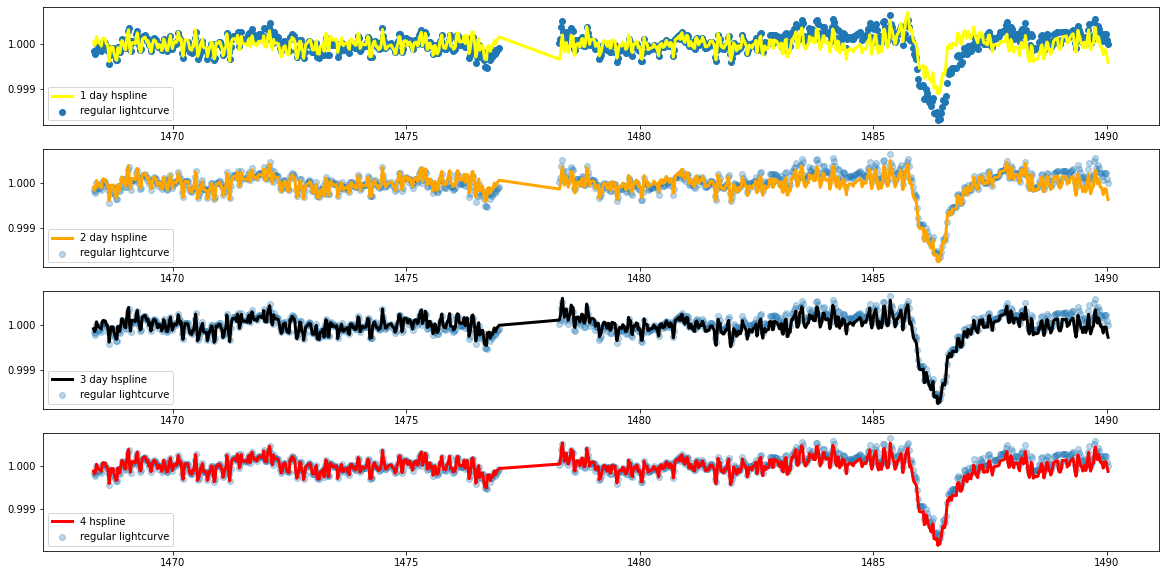

In [24]:
flatten_function(table["TIME"], table["PDCSAP_FLUX"], 1, 2, 3, 4, "hspline")

### TIC 7421463

check why they don't show up!

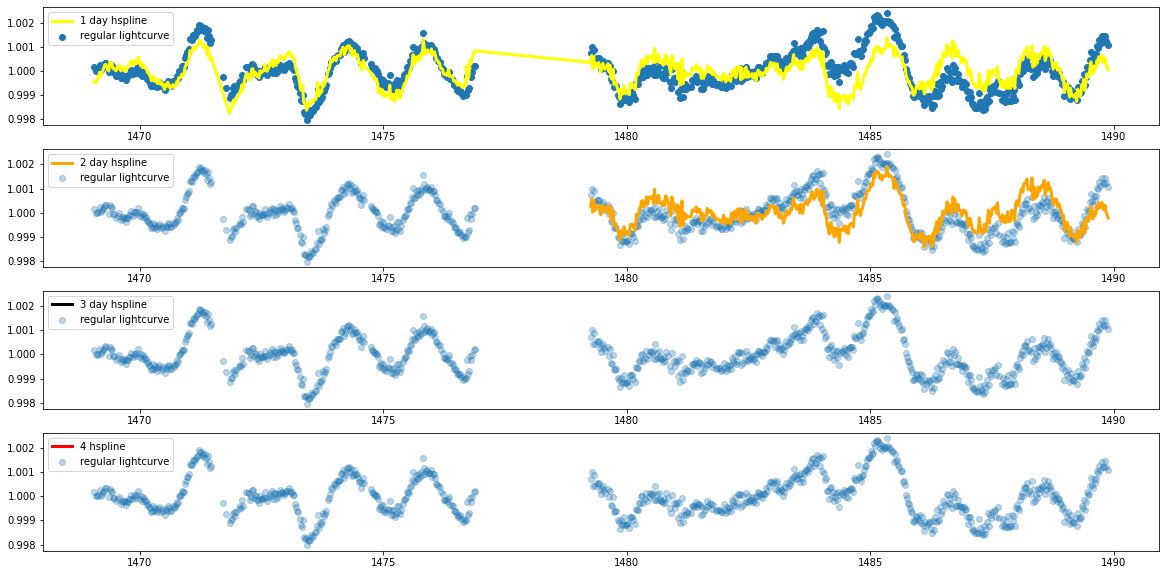

In [25]:
flatten_function(lc["time"], lc["corrected flux"], 1, 2, 3, 4, "hspline")

---

## Comparing methods - betapic

### two day window

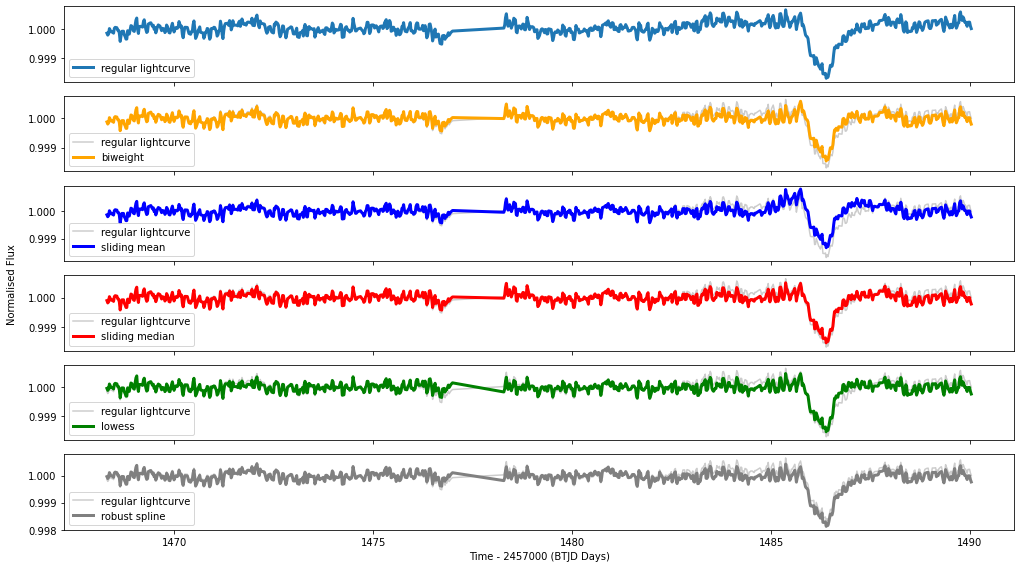

In [39]:
multiplot_windowlength(table["TIME"], table["PDCSAP_FLUX"], 2.25)

### two half day window

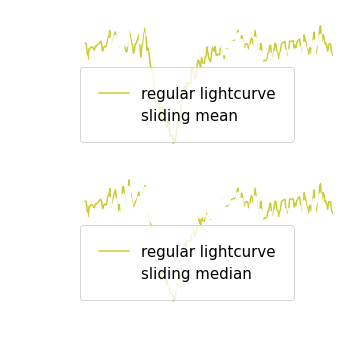

In [30]:
twoplot_windowlength(table["TIME"], table["PDCSAP_FLUX"], 2.25)

## Three day window

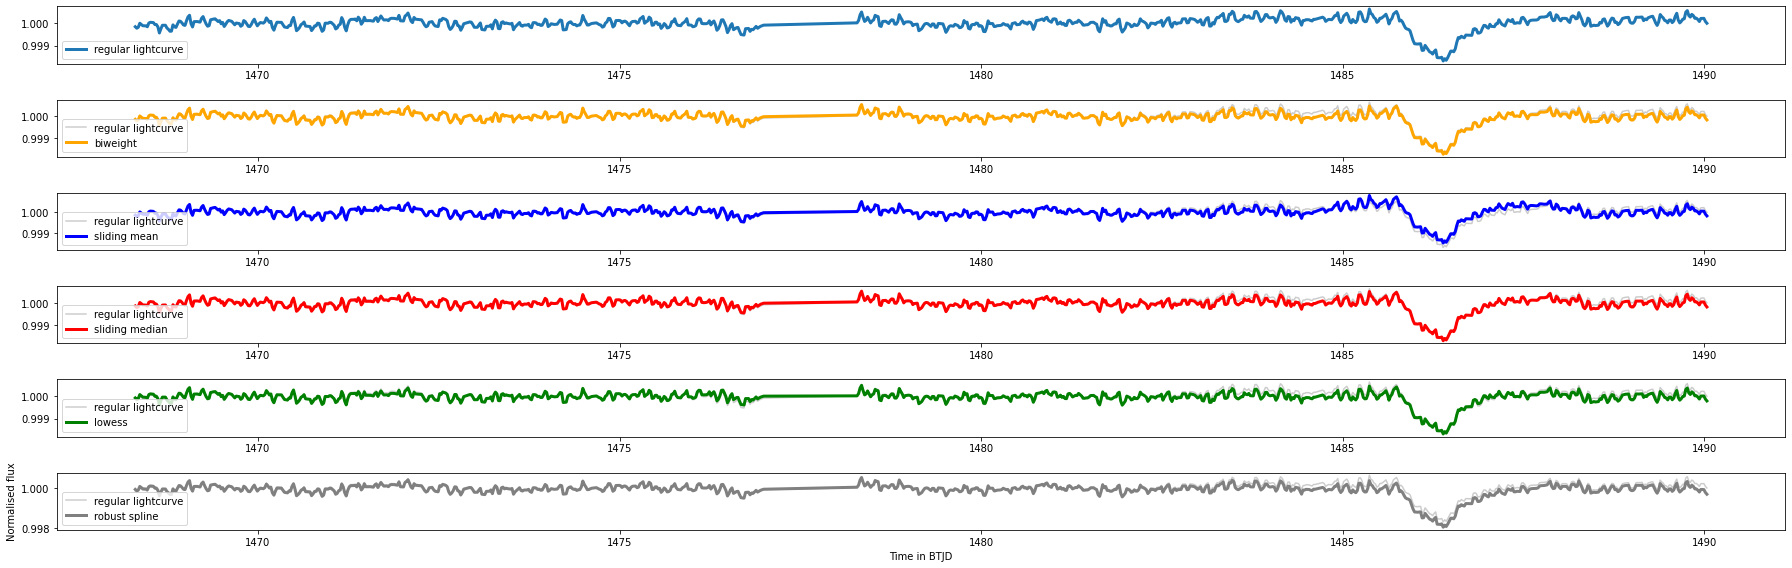

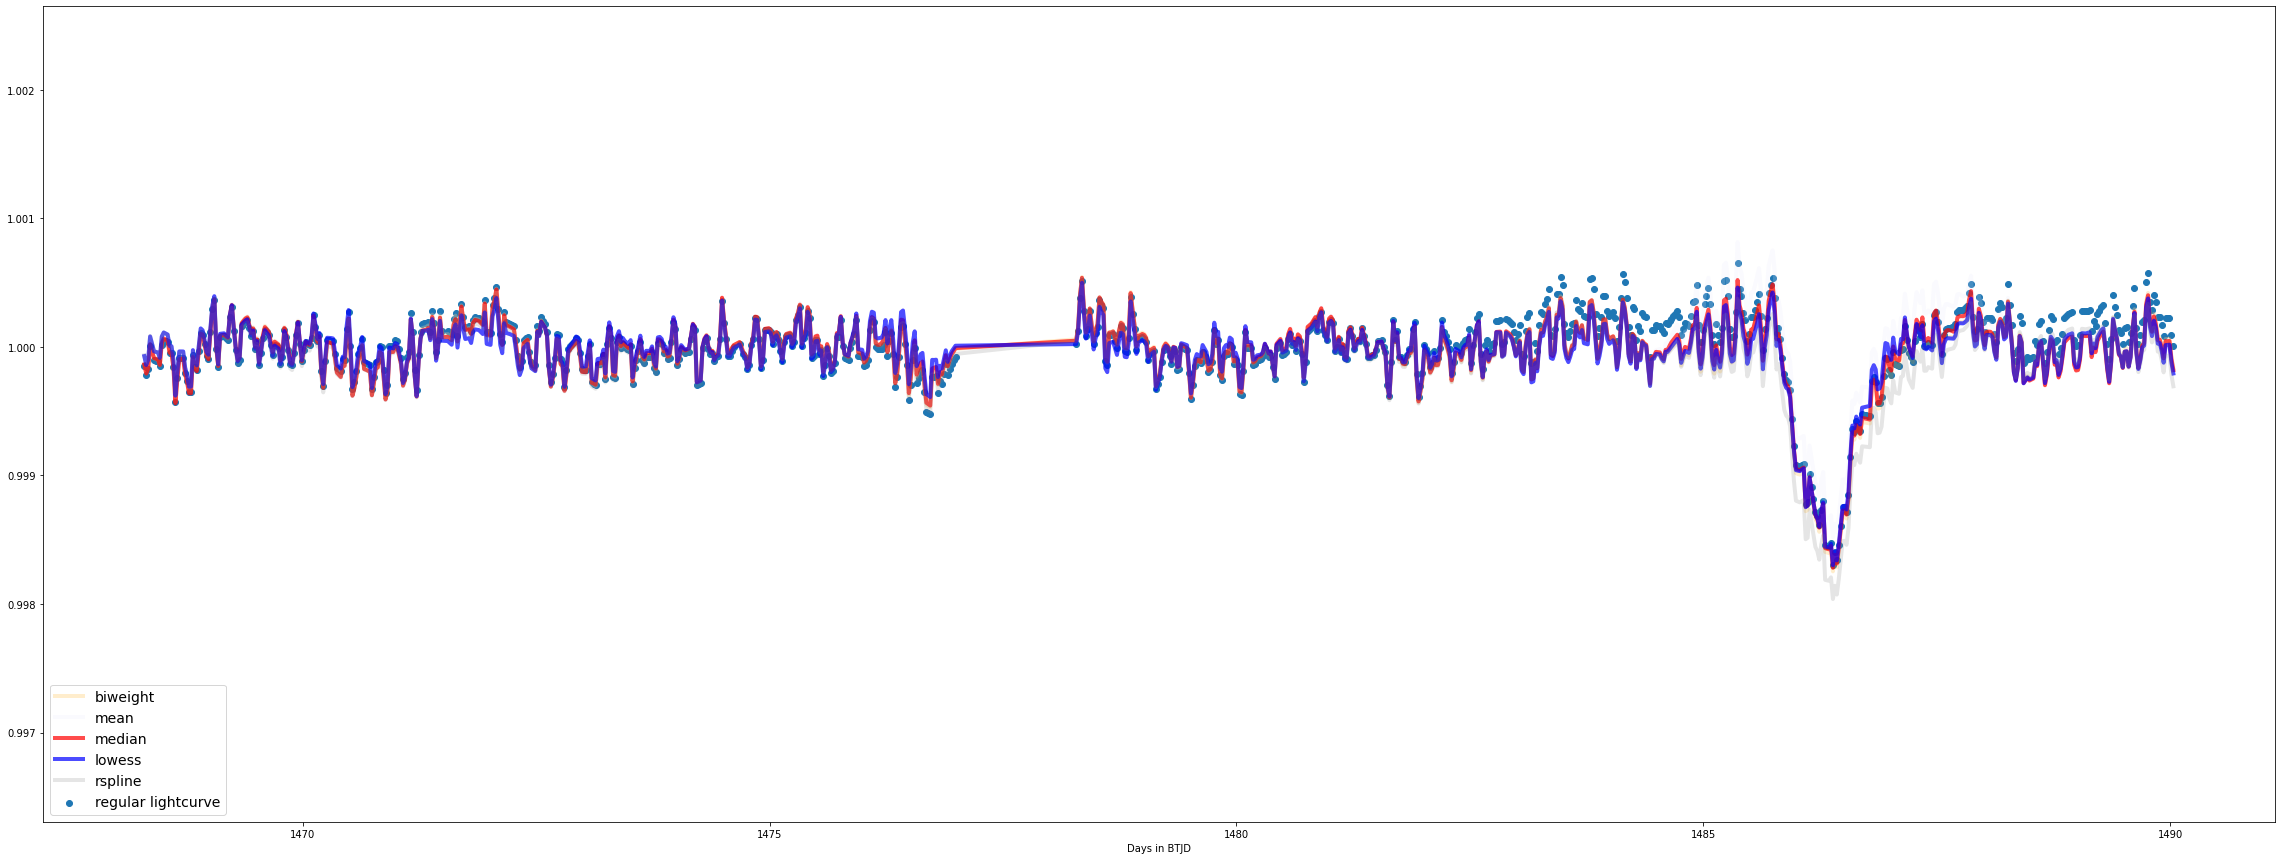

In [28]:
multiplot_windowlength(table["TIME"], table["PDCSAP_FLUX"], 3, combined_plot=True)

## five day window

In [ ]:
multiplot_windowlength(table["TIME"], table["PDCSAP_FLUX"], 5)

## ten day window

In [ ]:
multiplot_windowlength(table["TIME"], table["PDCSAP_FLUX"], 10)

---

## comparing methods: TIC 7421463

### one day

In [ ]:
multiplot_windowlength(lc["time"], lc["corrected flux"], 2, combined_plot=True)

In [ ]:
kep = import_lightcurve(
    "kepler/kplr011084727-2012004120508_llc.fits", drop_bad_points=True
)[0]

In [ ]:
plt.figure(figsize=(20, 10))
plt.plot(kep["TIME"], normalise_lc(kep["PDCSAP_FLUX"]))

In [ ]:
multiplot_windowlength(kep["TIME"], kep["PDCSAP_FLUX"], 1.5, combined_plot=True)

In [ ]:
t, flux, quality, real = clean_data(kep)
timestep = calculate_timestep(kep)
final = smoothing(kep, method=0, power=0.05)

In [ ]:
plt.plot(kep["TIME"], normalise_lc(kep["PDCSAP_FLUX"]))
plt.plot(t, final[1] + np.ones(len(final[1])))

In [ ]:
"kplr011084727-2012004120508_llc.fits".split("/")[-1].split("-")[0][4:]

### Robust estimator
An estimation technique which is insensitive to small departures from the idealized assumptions which have been used to optimize the algorithm

---

## AU Mic

Random lightcurve of AU Mic to show stellar variability removal methods.

In [ ]:
import lightkurve as lk

In [ ]:
data = lk.search_lightcurve("AU Mic", mission="TESS")[7].download()

In [ ]:
from astropy import table

In [ ]:
table = Table([data.time.value, data.flux.value, data.quality.value])

In [ ]:
t, flux, quality, real = clean_data(table)
timestep = calculate_timestep(table)

In [ ]:
final_flux, smoother = smoothing(table, method=1)

In [ ]:
final_flux2, smoother = smoothing(table, method=2, wotan_method="lowess")

In [ ]:
from wotan import flatten

In [ ]:
test = flatten(t, flux, method="lowess", window_length=2)

In [ ]:
plt.figure(figsize=(20, 10))
plt.plot(t, normalise_lc(flux))
plt.plot(t, final_flux + np.ones(len(final_flux)) - 0.05)
plt.plot(t, final_flux2 - 0.1)
plt.plot(t, test - 0.15)

---

## DS Tuc

In [ ]:
dstuc = lk.search_lightcurve("DS Tuc", mission="TESS")[2].download()
dstuc

In [ ]:
dstuc = Table([dstuc.time.value, dstuc.flux.value, dstuc.quality.value])

In [ ]:
t, flux, quality, real = clean_data(dstuc)
timestep = calculate_timestep(dstuc)
final_flux, smoother = smoothing(dstuc, method=1)
final_flux2, smoother = smoothing(dstuc, method=2, wotan_method="lowess")
test = flatten(t, flux, method="lowess", window_length=2)

In [ ]:
plt.figure(figsize=(20, 10))
plt.plot(t, normalise_lc(flux))
plt.plot(t, final_flux + np.ones(len(final_flux)) - 0.1)
plt.plot(t, final_flux2 - 0.2)
plt.plot(t, test - 0.3)

In [ ]:
factor = (1 / 48) / timestep
T1 = test_statistic_array(test, 60 * factor)
Ts = nonzero(T1).std()

m, n = np.unravel_index(
    T1.argmin(), T1.shape
)  # T.argmin(): location of  T.shape: 2D array with x,y points in that dimension
minT = T1[m, n]
minT_time = t[n]
minT_duration = m * timestep
Tm_start = n - math.floor((m - 1) / 2)
Tm_end = Tm_start + m
Tm_depth = flux[Tm_start:Tm_end].mean()

In [ ]:
print("Timestep of lightcurve: ", round(timestep * 1440, 3), "minutes.")
print("Maximum transit chance:")
print("   Time =", round(minT_time, 2), "days.")
print("   Duration =", round(minT_duration, 2), "days.")
print("   T =", round(minT, 1))
print("   T/sigma =", round(minT / Ts, 1))